In [50]:
import pandas
import seaborn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [51]:
df = pandas.read_csv("C:/Users/belkacem/Downloads/Mall_Customers.csv")

In [52]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Inspecting data set

In [53]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

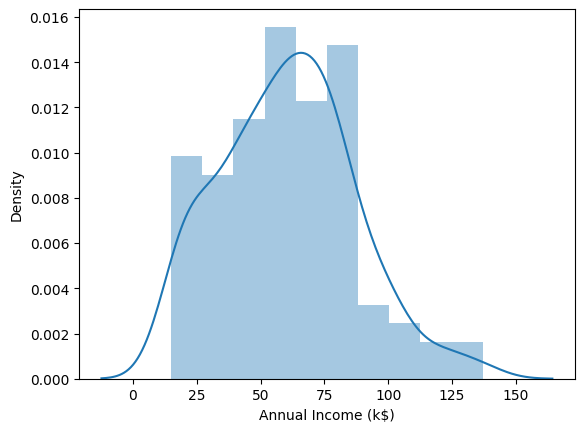

In [54]:
seaborn.distplot(df['Annual Income (k$)'])

In [55]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

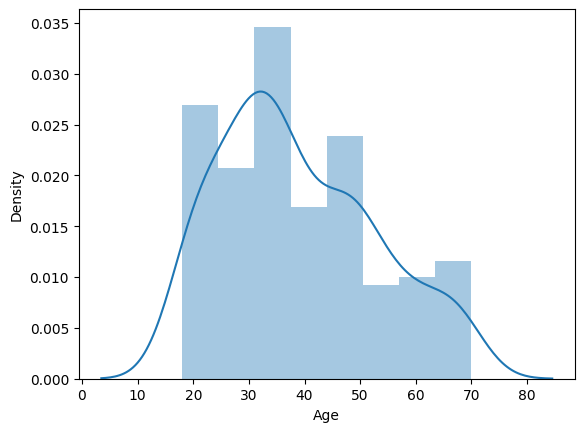

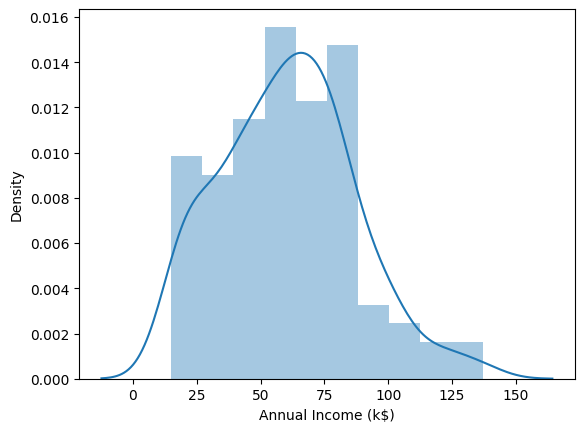

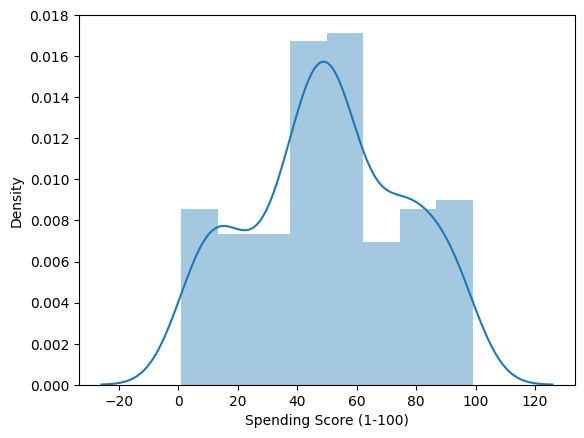

In [56]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns :
    plt.figure()
    seaborn.distplot(df[i])

In [58]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

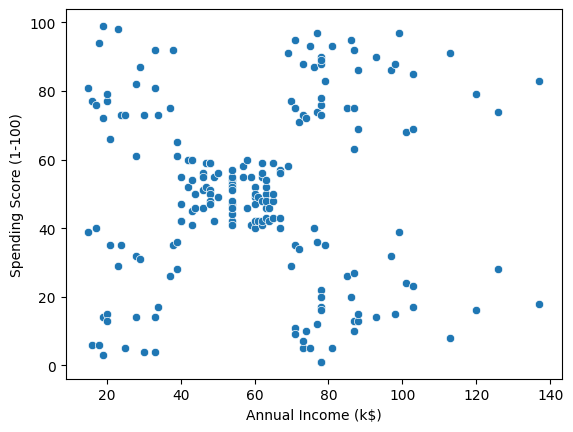

In [59]:
seaborn.scatterplot(data = df, x ='Annual Income (k$)', y ='Spending Score (1-100)' )

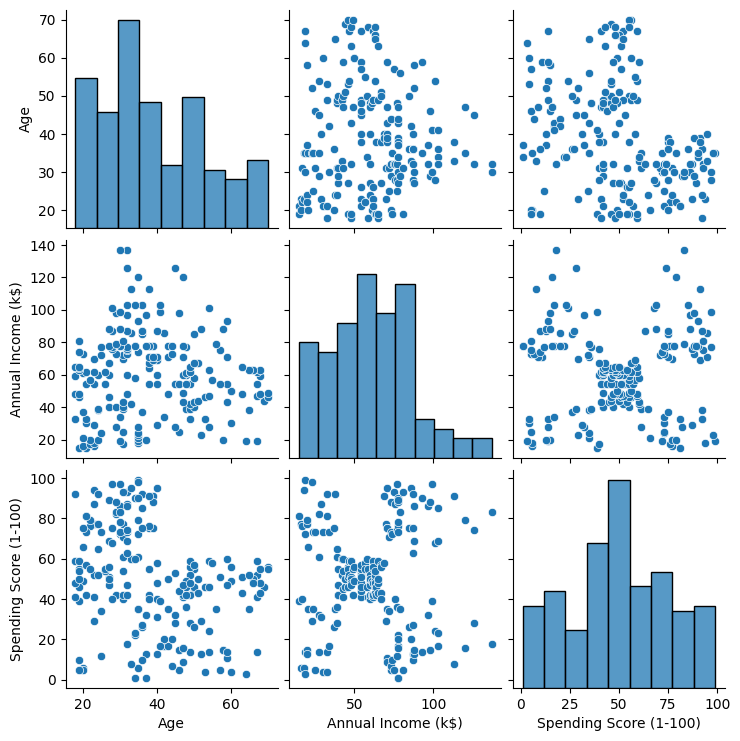

In [60]:
df=df.drop(['CustomerID'], axis=1)
seaborn.pairplot(df)

In [61]:
df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


# La clafication non supervisée

In [97]:
clustering1 = KMeans(n_clusters = 3)

In [98]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [99]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [100]:
df['Income cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [101]:
df['Income cluster'].value_counts()

Income cluster
2    90
1    74
0    36
Name: count, dtype: int64

In [102]:
clustering1.inertia_

23517.33093093093

In [103]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [104]:
inertia_scores

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8481.49619047619,
 5081.484660267268,
 3941.4163614163635,
 2857.441697191697,
 2208.81204906205,
 1758.1453823953832]

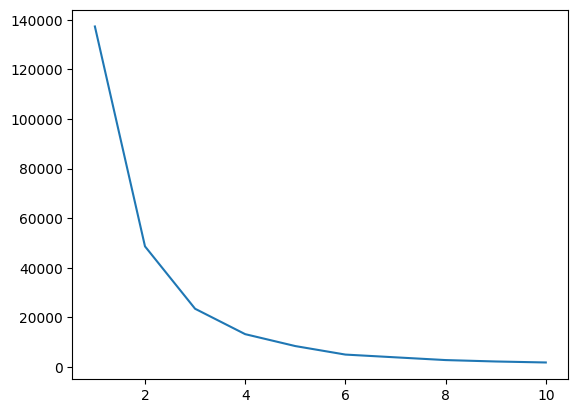

In [96]:
plt.plot(range(1,11),inertia_scores)

In [105]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income cluster'],
      dtype='object')

In [108]:
df.groupby('Income cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


In [120]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['spending and incom cluster']=clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,spending and incom cluster
0,Male,19,15,39,1,1
1,Male,21,15,81,1,2
2,Female,20,16,6,1,1
3,Female,23,16,77,1,2
4,Female,31,17,40,1,1


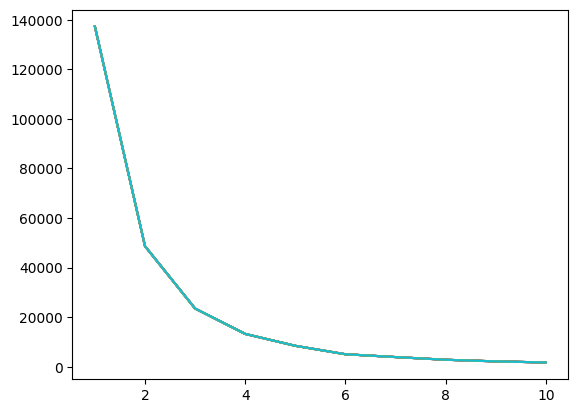

In [119]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans.inertia_)
    plt.plot(range(1,11),inertia_scores)

In [129]:
centers=pandas.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

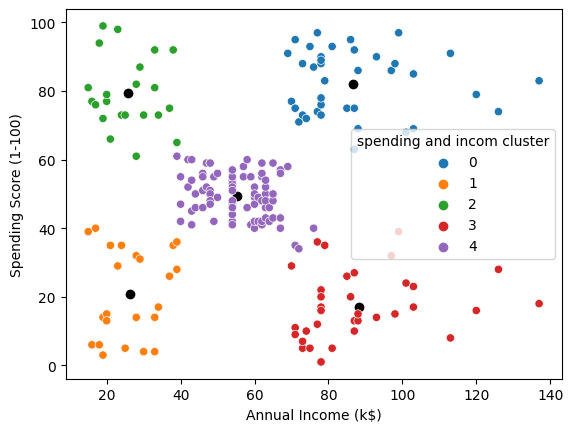

In [131]:
plt.scatter(x=centers['x'], y=centers['y'], c='black')
seaborn.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue ='spending and incom cluster', palette ='tab10' )

In [132]:
pandas.crosstab(df['spending and incom cluster'],df['Gender'], normalize='index')

Gender,Female,Male
spending and incom cluster,,
0,0.538462,0.461538
1,0.608696,0.391304
2,0.590909,0.409091
3,0.457143,0.542857
4,0.592593,0.407407


In [133]:
df.groupby('spending and incom cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
spending and incom cluster,,,
0,32.692308,86.538462,82.128205
1,45.217391,26.304348,20.913043
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,42.716049,55.296296,49.518519


As we can see the lowest age are in cluster 2 and they are spending a lot of money comparing to there salary
We can also see that the highest spending is cluster 4 witch represent 53% women